In [ ]:
#taxi_vendors= taxi.reset_index(level=0, drop=True)
#taxi_vendors.head()
taxi_vendors = taxi.groupby('vendor_id').count()[['id']]
taxi_vendors.head()
#taxi_vendors = taxi_vendors.reset_index(level=1, drop=True)
#taxi_vendors.unstack('id').plot()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taxi = pd.read_csv('train.csv')
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
taxi['date'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['pickup_hour']=taxi.date.dt.hour
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14 17:24:55,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12 00:43:35,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19 11:35:24,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06 19:32:31,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26 13:30:55,13


ГРАФИК №1
Выясняю, как связаны между собой различные признаки(например, количество пассажиров, время посадки, и конкретный перевозчик). 
А также по гистограммам,расположенным по диагонали, определяю распределения признака.

In [9]:
cols = ['vendor_id', 'passenger_count','pickup_hour']

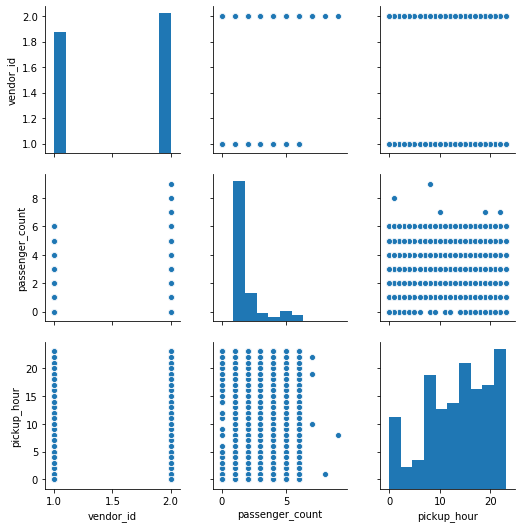

In [10]:
sns_plot = sns.pairplot(taxi[cols])
sns_plot

В итоге, наблюдаю равномерность распределений значений, линейных зависимостей между признаками не наблюдаю. 

# График №2. Проверяю влияние количества пассажиров на длительность поезки

In [ ]:
#Удаляю "выбросы" из данных, для большей полезности графика drop(['924150'],['680594'],['355003'])
taxi=taxi.drop(taxi.index[978383])

In [ ]:
taxi=taxi.drop(taxi.index[924150])

In [ ]:
taxi=taxi.drop(taxi.index[680594])

In [ ]:
taxi=taxi.drop(taxi.index[355003])

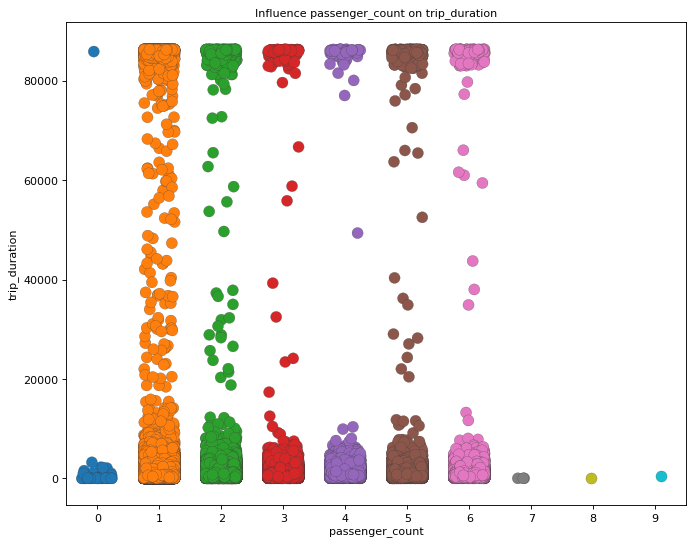

In [56]:
График №2

#Удаляю "выбросы" из данных, для большей полезности графика drop(['924150'],['680594'],['355003'])
fig, ax = plt.subplots(figsize=(10,8), dpi= 80)    
sns.stripplot(taxi.passenger_count, taxi.trip_duration, jitter=0.25, size=10, ax=ax, linewidth=.2)

# Decorations
plt.title('Influence passenger_count on trip_duration', fontsize=10)
plt.show()

В итоге : 
1) в выборке присутствуют 'технические поездки ' с нулевым количеством пассажиров
2) линейная зависимость между кол-ом пассажиров и длительностью поездки отсутствует
